In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import sklearn
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from sklearn import metrics 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from keras.optimizers import SGD
# Imports and load dataset
music_data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Offensive_Chat_Logs - Sheet1.csv')

In [ ]:
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from xgboost import XGBClassifier
from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelEncoder
# Getting data and creating proper feature dataset
df = music_data
df = df.dropna()
comment = df['Comment']
y = df['is_offensive']
df['Comment'] = df['Comment'].str.split()
df = df.Comment.apply(pd.Series)
#for el in df['Comment']:
 # el = el.translate(str.maketrans('','',string.punctuation))
  #words = el.split()
  #for word in words:
   # df[word] = 1

#static = pd.get_dummies(train_data[‘country’],prefix_sep=’_’,prefix=’country’)
df["Comment"] = comment
df["is_offensive"] = y
df.set_index(df["Comment"])
display(df)


# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
features, y, test_size=.25, random_state=42)


<ipython-input-21-9ccbb6225ef4>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Comment'] = df['Comment'].str.split()


,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,Comment,is_offensive
0,The,SAME,PEOPLE,that,be,calling,people,hoes,be,the,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The SAME PEOPLE that be calling people hoes be...,1.0
1,Its,been,especially,bad,this,year,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Its been especially bad this year,0.0
2,I’m,absolutely,NOT,a,conspiracy,"theorist,",but,this,stuff,has,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"I’m absolutely NOT a conspiracy theorist, but ...",0.0
3,Does,it,matter,if,Steph,Curry,gets,a,ring,that,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Does it matter if Steph Curry gets a ring that,0.0
4,I,will,bet,my,house,that,the,league,is,rigged,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I will bet my house that the league is rigged,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,The,South,is,full,of,white,trash.,The,Midwest,is,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The South is full of white trash. The Midwest ...,1.0
283,If,everybody,already,"hit,",Of,course,a,nigga,can't,take,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"If everybody already hit, Of course a nigga ca...",1.0
284,chili,cheese,fries,a,bad,idea,for,lunch..,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chili cheese fries a bad idea for lunch..,0.0
285,Europe,sounds,gr8!,Will,finish,my,exam,on,Teus,and,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe sounds gr8! Will finish my exam on Teus...,0.0


In [3]:
import numpy as np
import csv
from sklearn.feature_extraction.text import CountVectorizer # bag-of-words
import spacy
import mmap
import unidecode
from word2number import w2n
import contractions
from collections import Counter
import random
import pandas as pd
import os
nlp = spacy.load('en_core_web_sm')

def make_dict(f):
  d = dict()
  lines = f.read().splitlines()
  for line in lines:
    d[f'{line.lower()}'] = 1
  return d

def remove_whitespace(text):
    """remove extra whitespaces from text"""
    text = text.strip()
    return " ".join(text.split())


def remove_accented_chars(text):
    """remove accented characters from text, e.g. café"""
    text = unidecode.unidecode(text)
    return text


def expand_contractions(text):
    """expand shortened words, e.g. don't to do not"""
    text = contractions.fix(text)
    return text


def text_preprocessing(text, accented_chars=True, contractions=True,
                       convert_num=True, extra_whitespace=True,
                       lemmatization=True, lowercase=True, punctuations=True,
                       remove_num=True, special_chars=True,
                       stop_words=False):
    """preprocess text with default option set to true for all steps"""

    if extra_whitespace:  # remove extra whitespaces
        text = remove_whitespace(text)
    if accented_chars:  # remove accented characters
        text = remove_accented_chars(text)
    if contractions:  # expand contractions
        text = expand_contractions(text)
    if lowercase:  # convert all characters to lowercase
        text = text.lower()

    doc = nlp(text)  # tokenise text

    clean_text = []

    for token in doc:
        flag = True
        edit = token.text
        # remove stop words
        if stop_words == True and token.is_stop and token.pos_ != 'NUM':
            flag = False
        # remove punctuations
        if punctuations == True and token.pos_ == 'PUNCT' and flag == True:
            flag = False
        # remove special characters
        if special_chars == True and token.pos_ == 'SYM' and flag == True:
            flag = False
        # remove numbers
        if remove_num == True and (token.pos_ == 'NUM' or token.text.isnumeric()) \
                and flag == True:
            flag = False
        # convert number words to numeric numbers
        if convert_num == True and token.pos_ == 'NUM' and flag == True:
            edit = w2n.word_to_num(token.text)
        # convert tokens to base form
        elif lemmatization == True and token.lemma_ != "-PRON-" and flag == True:
            edit = token.lemma_
        if len(token) < 2:
            edit = ""
        # append tokens edited and not removed to list
        if edit != "" and flag == True:
            clean_text.append(edit)

    return clean_text

def make_singular(s):
  processed = nlp(s)
  lemma_tags = {"NNS", "NNPS"}
  for token in processed:
    lemma = token.text
    if token.tag_ in lemma_tags:
      lemma = token.lemma_


""" extract data from dataset. """
def offensiveDataframe(filename: str, bad_only):
  nlp = spacy.load('en_core_web_sm')
  df = pd.DataFrame()
  # Open file for reading
  with open(filename, "r", encoding='utf-8-sig') as file_ptr:

    # Read each line of the file
    file_csv = csv.reader(file_ptr)
    count = 0
    f_bad = open('/content/gdrive/MyDrive/Colab Notebooks/Bad_Word_Data.txt')
    bad = make_dict(f_bad)

    
    f_slur = open('/content/gdrive/MyDrive/Colab Notebooks/Racial_Slur_Data.txt')
    slur = make_dict(f_slur)
    df['isOffensive'] = np.nan
    for line in file_csv:
            # get features
      if count != 0:
        temp = dict()
        offensive_line = line[0]
        comment_type = line[1] # offensive or not
        has_bad = 0
        has_slur = 0
        processed = text_preprocessing(offensive_line)
        temp['phrase'] = processed
        temp['isOffensive'] = comment_type

        if bad_only:
          for token in processed:
            if bad.get(token) == 1:
              if token not in df:
                df[token] = np.nan
                df[token] = df[token].astype('category')
              temp[token] = 1
              has_bad = 1
              
          for token in processed:
            if slur.get(token) == 1:
              if token not in df:
                df[token] = np.nan
                df[token] = df[token].astype('category')
              temp[token] = 1
              has_slur = 1
        else:
          for token in processed:
            if token not in df:
              df[token] = np.nan
              df = df.copy()
              df[token] = df[token].astype('category')
            temp[token] = 1

        df.loc[len(df.index)] = temp
      count +=1
    df = df.fillna(0)
  return df


""" create data features. """
def get_data_features(data: list):
    vector = CountVectorizer()

    # Fit the bag-of-words model
    bag_of_words = vector.fit_transform(data)
    
    return (vector.get_feature_names_out(), bag_of_words.toarray())
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/')
o = offensiveDataframe("Offensive_Chat_Logs - Sheet1.csv", bad_only=False)
obdf = offensiveDataframe("Offensive_Chat_Logs - Sheet1.csv", bad_only=True) 
o

,isOffensive,the,same,people,that,be,call,hoe,main,one,...,teus,we`ll,talk,reflect,mirror,uno,reverse,@rollingwithtrin,knowwww,steal
0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
284,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
285,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
286,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV
o = pd.DataFrame(o)
#o.columns = ['Comment', 'has_bad_word', 'has_slur', 'is_offensive']
display(o)
#o.set_index('0')
y = o['isOffensive']
features = o.drop(['isOffensive'], axis = 1)
y = y.astype(int)

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
features, y, test_size=.25, random_state=42)

obdf = pd.DataFrame(obdf)
#o.columns = ['Comment', 'has_bad_word', 'has_slur', 'is_offensive']

#o.set_index('0')
y2 = obdf['isOffensive']
features2 = obdf.drop(['isOffensive'], axis = 1)
y2 = y2.astype(int)

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
features, y, test_size=.25, random_state=42)

X_train2, X_test2, y_train2, y_test2 = train_test_split(
features2, y2, test_size=.25, random_state=42)


,isOffensive,the,same,people,that,be,call,hoe,main,one,...,teus,we`ll,talk,reflect,mirror,uno,reverse,@rollingwithtrin,knowwww,steal
0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
284,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
285,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
286,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


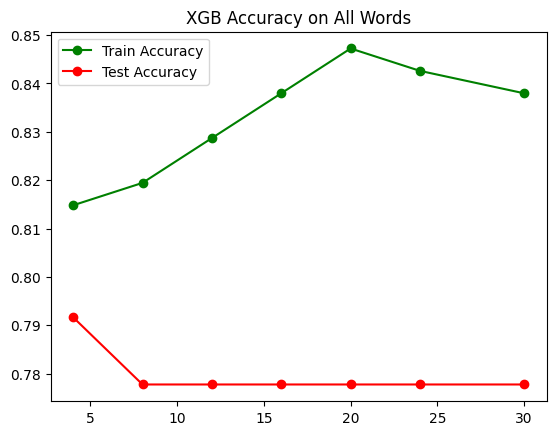

In [ ]:
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
m = [4, 8, 12, 16, 20, 24, 30]
scores = []
scores2 = []
for n in m:
    model_xgb = XGBClassifier(n_estimators=n, learning_rate=.1, max_depth = 3)
    model_xgb.fit(X_train, y_train)
    scores.append(model_xgb.score(X_train, y_train))
    scores2.append(model_xgb.score(X_test, y_test))
plt.plot(m, scores, 'o-', label='Train Accuracy', color = 'g')
plt.plot(m, scores2, 'o-', label='Test Accuracy', color = 'r')
plt.legend()
plt.title("XGB Accuracy on All Words")
plt.show()

In [ ]:
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score


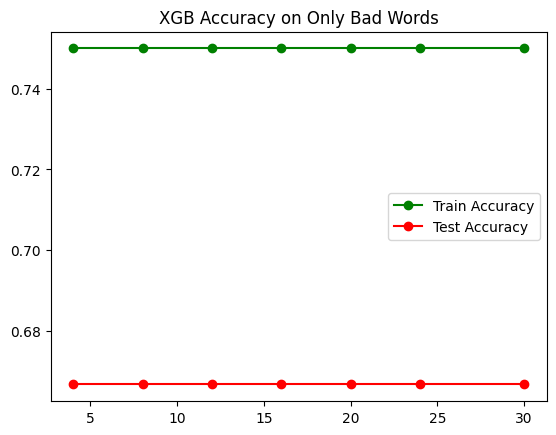

In [ ]:
m = [4, 8, 12, 16, 20, 24, 30]
scores = []
scores2 = []
for n in m:
    model_xgb = XGBClassifier(n_estimators=n, learning_rate=.1, max_depth = 3)
    model_xgb.fit(X_train2, y_train2)
    scores.append(model_xgb.score(X_train2, y_train2))
    scores2.append(model_xgb.score(X_test2, y_test2))
plt.plot(m, scores, 'o-', label='Train Accuracy', color = 'g')
plt.plot(m, scores2, 'o-', label='Test Accuracy', color = 'r')
plt.legend()
plt.title("XGB Accuracy on Only Bad Words")
plt.show()

In [8]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
pred = lm.predict_proba(X_test)
acc_train = lm.score(X_train, y_train)
print("Results for Logistic Regression on All Words\n")
print("Accuracy on train = %0.4f " % acc_train)
acc_test = lm.score(X_test, y_test)
print("Accuracy on test = %0.4f " % acc_test)
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

print(pred)

Results for Logistic Regression on All Words

Accuracy on train = 0.9954 
Accuracy on test = 0.8056 
[[0.94086979 0.05913021]
 [0.85415858 0.14584142]
 [0.77812256 0.22187744]
 [0.75914889 0.24085111]
 [0.85182537 0.14817463]
 [0.87301867 0.12698133]
 [0.83523871 0.16476129]
 [0.7266137  0.2733863 ]
 [0.57971072 0.42028928]
 [0.4935895  0.5064105 ]
 [0.21445994 0.78554006]
 [0.94029418 0.05970582]
 [0.81270863 0.18729137]
 [0.60603546 0.39396454]
 [0.62474536 0.37525464]
 [0.10929218 0.89070782]
 [0.90105104 0.09894896]
 [0.12384425 0.87615575]
 [0.9369779  0.0630221 ]
 [0.24291865 0.75708135]
 [0.75657631 0.24342369]
 [0.20793752 0.79206248]
 [0.86600901 0.13399099]
 [0.7970327  0.2029673 ]
 [0.74055882 0.25944118]
 [0.60491902 0.39508098]
 [0.64420113 0.35579887]
 [0.80178397 0.19821603]
 [0.55525911 0.44474089]
 [0.15295771 0.84704229]
 [0.4853557  0.5146443 ]
 [0.74368127 0.25631873]
 [0.73320907 0.26679093]
 [0.77411547 0.22588453]
 [0.44285055 0.55714945]
 [0.83255118 0.16744882]

In [ ]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(X_train2, y_train2)
y_pred = lm.predict(X_test2)
pred = lm.predict_proba(X_test2)
acc_train = lm.score(X_train2, y_train2)
print("Results for Logistic Regression on Only Bad Words\n")
print("Accuracy on train = %0.4f " % acc_train)
acc_test = lm.score(X_test2, y_test2)
print("Accuracy on test = %0.4f " % acc_test)
print(classification_report(y_test, y_pred))

Results for Logistic Regression on Only Bad Words

Accuracy on train = 0.7917 
Accuracy on test = 0.6944 
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        41
           1       1.00      0.29      0.45        31

    accuracy                           0.69        72
   macro avg       0.83      0.65      0.62        72
weighted avg       0.80      0.69      0.64        72



In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
pred = clf.predict_proba(X_test)
acc_train = clf.score(X_train, y_train)
print("Accuracy on train = %0.4f " % acc_train)
acc_test = clf.score(X_test, y_test)
print("Accuracy on test = %0.4f " % acc_test)

Accuracy on train = 1.0000 
Accuracy on test = 0.7639 


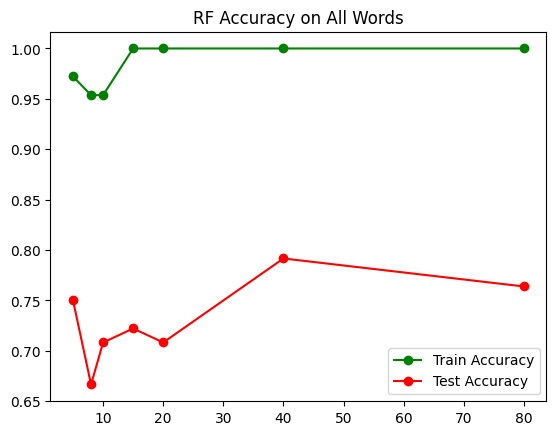

In [ ]:
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
m = [5, 8, 10, 15, 20, 40, 80]
scores = []
scores2 = []
for n in m:
    model_xgb = RandomForestClassifier(n_estimators=n)
    model_xgb.fit(X_train, y_train)
    scores.append(model_xgb.score(X_train, y_train))
    scores2.append(model_xgb.score(X_test, y_test))
plt.plot(m, scores, 'o-', label='Train Accuracy', color = 'g')
plt.plot(m, scores2, 'o-', label='Test Accuracy', color = 'r')
plt.legend()
plt.title("RF Accuracy on All Words")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train2, y_train2)
y_pred = clf.predict(X_test2)
pred = clf.predict_proba(X_test2)
acc_train = clf.score(X_train2, y_train2)
print("Accuracy on train = %0.4f " % acc_train)
acc_test = clf.score(X_test2, y_test2)
print("Accuracy on test = %0.4f " % acc_test)

Accuracy on train = 0.8519 
Accuracy on test = 0.7083 


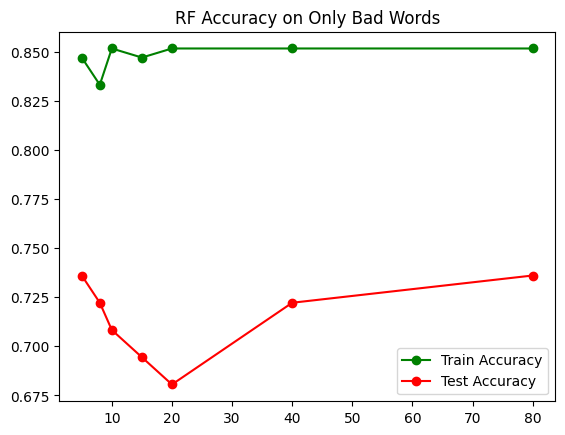

In [ ]:
m = [5, 8, 10, 15, 20, 40, 80]
scores = []
scores2 = []
for n in m:
    model_xgb = RandomForestClassifier(n_estimators=n)
    model_xgb.fit(X_train2, y_train2)
    scores.append(model_xgb.score(X_train2, y_train2))
    scores2.append(model_xgb.score(X_test2, y_test2))
plt.plot(m, scores, 'o-', label='Train Accuracy', color = 'g')
plt.plot(m, scores2, 'o-', label='Test Accuracy', color = 'r')
plt.legend()
plt.title("RF Accuracy on Only Bad Words")
plt.show()

In [ ]:
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from keras.utils.vis_utils import plot_model
from keras.optimizers import SGD
from sklearn.metrics import accuracy_score, classification_report
def baselineNN(dims):
    model = Sequential()
    model.add(Dense(10, input_dim=dims, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, input_dim=dims, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(10, input_dim=dims, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='sigmoid'))
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    #model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def use_keras_nn_model(x, y, xx, yy, epochs):
    model = baselineNN(x.shape[1])
    hist = model.fit(x.to_numpy(), y.to_numpy(), epochs=epochs, validation_data = (X_test.to_numpy(),y_test.to_numpy()))
    y_pred = model.predict(xx.to_numpy()).reshape(xx.shape[0],)
    return y_pred, model, hist
y_pred_nn, model_nn, hist_nn = use_keras_nn_model(X_train, y_train, X_test, y_test, 100)
#y_pred_nn2, model_nn2, hist_nn2 = use_keras_nn_model(X_train2, y_train2, X_test2, y_test2, 100)
# Plot the accuracy of the model over epochs

fig, axs = plt.subplots(2,figsize=(10,10))
  
# accuracy 
axs[0].plot(hist_nn2.history["accuracy"], label="train")
axs[0].plot(hist_nn2.history["val_accuracy"], label="test")    
axs[0].set_ylabel("Accuracy")
axs[0].legend()
axs[0].set_title("Accuracy")
      
# Error 
axs[1].plot(hist_nn2.history["loss"], label="train")
axs[1].plot(hist_nn2.history["val_loss"], label="test")    
axs[1].set_ylabel("Error")
axs[1].legend()
axs[1].set_title("Error")
      
plt.show()

Epoch 1/100
7/7 [==============================] - 6s 123ms/step - loss: 0.7036 - accuracy: 0.4537 - val_loss: 0.7030 - val_accuracy: 0.3750
Epoch 2/100
7/7 [==============================] - 0s 19ms/step - loss: 0.6974 - accuracy: 0.4861 - val_loss: 0.6985 - val_accuracy: 0.4167
Epoch 3/100
7/7 [==============================] - 0s 20ms/step - loss: 0.6866 - accuracy: 0.5972 - val_loss: 0.6960 - val_accuracy: 0.4583
Epoch 4/100
7/7 [==============================] - 0s 26ms/step - loss: 0.6889 - accuracy: 0.6019 - val_loss: 0.6942 - val_accuracy: 0.5139
Epoch 5/100
7/7 [==============================] - 0s 31ms/step - loss: 0.6837 - accuracy: 0.6481 - val_loss: 0.6926 - val_accuracy: 0.5417
Epoch 6/100
7/7 [==============================] - 0s 21ms/step - loss: 0.6816 - accuracy: 0.6435 - val_loss: 0.6914 - val_accuracy: 0.5417
Epoch 7/100
7/7 [==============================] - 0s 22ms/step - loss: 0.6743 - accuracy: 0.7222 - val_loss: 0.6906 - val_accuracy: 0.5556
Epoch 8/100
7/7 [==

NameError: ignored

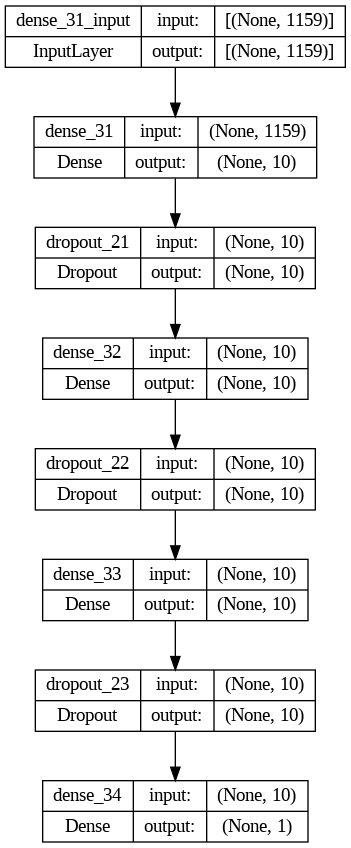

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model_nn, show_shapes=True, show_layer_names=True)

In [ ]:
import catboost as cb
# Cat Boost
clf = cb.CatBoostClassifier(verbose=0, eval_metric='Accuracy')
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
acc_train = clf.score(X_train, y_train)
print("Accuracy on train = %0.4f " % acc_train)
acc_test = clf.score(X_test, y_test)
print("Accuracy on test = %0.4f " % acc_test)

Accuracy on train = 0.8981 
Accuracy on test = 0.7639 


In [ ]:
import catboost as cb
# Cat Boost
clf = cb.CatBoostClassifier(verbose=0, eval_metric='Accuracy')
clf.fit(X_train2, y_train2)
preds = clf.predict(X_test2)
acc_train = clf.score(X_train2, y_train2)
print("Accuracy on train = %0.4f " % acc_train)
acc_test = clf.score(X_test2, y_test2)
print("Accuracy on test = %0.4f " % acc_test)

Accuracy on train = 0.8009 
Accuracy on test = 0.6944 


In [2]:
!pip install contractions
!pip install word2number
!pip install Unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 11.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5582 sha256=18a7d700ddd6053643a9996d398024a79cc54fa370790387e9797ddb6035ff52
  Stored in directory: /root/.cache/pip/wheels/a0/4a/5b/d2f2df5c344ddbecb8bea759872c207ea91d93f57fb54e816e
Successfully built word2number
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 5.1 MB/s eta 0:00:00
